## 1. Medidas de posição: percentis, quartis, decis

### Parte teórica
As medidas de posição são estatísticas que indicam a localização relativa de um valor dentro de um conjunto de dados ordenados. Elas complementam as medidas de tendência central e de dispersão, permitindo identificar com maior precisão como os valores estão distribuídos.

O conceito mais geral é o **percentil**. O percentil p (0 ≤ p ≤ 100) é o valor abaixo do qual se encontra p% da amostra. Por exemplo, se a nota de um aluno está no percentil 80 de uma turma, isso significa que 80% dos estudantes obtiveram notas iguais ou inferiores à dele. Percentis são muito utilizados em relatórios educacionais, em indicadores de saúde e em benchmarks de desempenho.

Entre os percentis, destacam-se os **quartis**, que dividem a distribuição em quatro partes iguais:
- **Q1 (primeiro quartil)**: 25% dos dados estão abaixo deste valor.  
- **Q2 (segundo quartil)**: corresponde à mediana, 50% dos dados estão abaixo.  
- **Q3 (terceiro quartil)**: 75% dos dados estão abaixo.  

A diferença Q3 − Q1 define o **intervalo interquartil (IQR)**, que concentra a metade central dos dados. O IQR é amplamente usado na detecção de outliers, pois valores muito afastados desse intervalo indicam observações atípicas.

Os **decis** dividem a distribuição em dez partes iguais, correspondendo aos percentis 10, 20, 30, até 90. Por exemplo, em avaliações de larga escala, como exames nacionais, é comum classificar o desempenho dos participantes em decis para comparar grupos distintos.

#### Exemplo numérico
Considere a amostra de idades: {12, 14, 15, 16, 18, 19, 20, 21, 23, 30}.  
- O **percentil 50** é 18, que corresponde à mediana.  
- O **Q1 (percentil 25)** é 15, indicando que 25% dos valores são menores ou iguais a 15.  
- O **Q3 (percentil 75)** é 21, de modo que 75% dos valores são menores ou iguais a 21.  
- O **IQR** é 21 − 15 = 6, representando a amplitude central onde estão 50% dos dados.  
- O **decil 9 (percentil 90)** é 30, indicando que apenas 10% dos valores estão acima dele.

Esse tipo de análise permite resumir distribuições extensas e é fundamental em mineração de dados, pois possibilita comparar diferentes populações, criar faixas de classificação e preparar dados para visualizações gráficas como o boxplot.


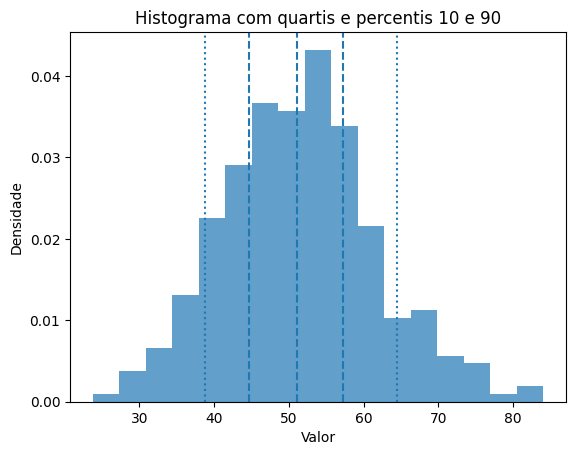

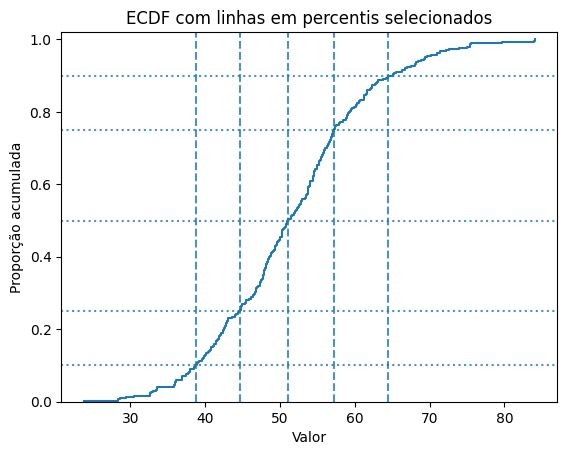

(   percentil      valor
 0          1  29.439101
 1          5  35.967829
 2         10  38.820493
 3         25  44.636989
 4         50  51.043106
 5         75  57.210587
 6         90  64.487083
 7         95  69.382482
 8         99  75.599465,
     medida      valor
 0       Q1  44.636989
 1  Mediana  51.043106
 2       Q3  57.210587
 3      IQR  12.573599,
    decil      valor
 0      1  38.820493
 1      2  42.533398
 2      3  46.667079
 3      4  48.566845
 4      5  51.043106
 5      6  53.941905
 6      7  56.109719
 7      8  59.189064
 8      9  64.487083)

In [1]:
# Medidas de posição com visualizações: percentis, quartis, decis e IQR
# Este bloco deve aparecer ANTES do boxplot no notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reprodutibilidade
rng = np.random.default_rng(42)

# Amostra simulada
n = 300
dados = rng.normal(loc=52, scale=11, size=n)
s = pd.Series(dados, name="x")

# Percentis de interesse
ps = [1, 5, 10, 25, 50, 75, 90, 95, 99]
val_percentis = np.percentile(s, ps)

# Quartis e IQR
quartis = s.quantile([0.25, 0.50, 0.75])
q1, q2, q3 = quartis.loc[0.25], quartis.loc[0.50], quartis.loc[0.75]
iqr = q3 - q1

# Decis
decis_index = np.linspace(0.1, 0.9, 9)
decis = s.quantile(decis_index)

# Tabelas resumo
tabela_percentis = pd.DataFrame({
    "percentil": ps,
    "valor": val_percentis
})

tabela_quartis = pd.DataFrame({
    "medida": ["Q1", "Mediana", "Q3", "IQR"],
    "valor": [q1, q2, q3, iqr]
})

tabela_decis = decis.reset_index()
tabela_decis.columns = ["decil_proporcao", "valor"]
tabela_decis["decil"] = (tabela_decis["decil_proporcao"] * 10).astype(int)

# Gráfico 1. Histograma com linhas de quartis e percentis selecionados
plt.figure()
plt.hist(s, bins="auto", density=True, alpha=0.7)
plt.axvline(q1, linestyle="--")
plt.axvline(q2, linestyle="--")
plt.axvline(q3, linestyle="--")
picks = {10: np.percentile(s, 10), 90: np.percentile(s, 90)}
plt.axvline(picks[10], linestyle=":")
plt.axvline(picks[90], linestyle=":")
plt.title("Histograma com quartis e percentis 10 e 90")
plt.xlabel("Valor")
plt.ylabel("Densidade")
plt.show()

# Gráfico 2. ECDF com linhas de referência em percentis
xs = np.sort(s.values)
ys = np.arange(1, xs.size + 1) / xs.size
plt.figure()
plt.plot(xs, ys, drawstyle="steps-post")
for p in [10, 25, 50, 75, 90]:
    v = np.percentile(s, p)
    plt.axvline(v, linestyle="--", alpha=0.8)
    plt.axhline(p / 100.0, linestyle=":", alpha=0.8)
plt.title("ECDF com linhas em percentis selecionados")
plt.xlabel("Valor")
plt.ylabel("Proporção acumulada")
plt.ylim(0, 1.02)
plt.show()

# Resultado numérico principal
tabela_percentis, tabela_quartis, tabela_decis[["decil", "valor"]]


### Explicação linha a linha

1. Importações de numpy, pandas e matplotlib para simulação, manipulação e visualização.
2. Criação do gerador pseudoaleatório com semente fixa para garantir reprodutibilidade.
3. Definição do tamanho da amostra e geração dos dados a partir de uma normal com média 52 e desvio 11.
4. Conversão do vetor em série pandas nomeada para facilitar operações.
5. Definição da lista de percentis de interesse em pontos típicos de cauda e centro.
6. Cálculo dos valores de percentis com numpy.percentile.
7. Cálculo dos quartis com pandas.quantile e extração de Q1, mediana e Q3.
8. Cálculo do IQR como Q3 menos Q1.
9. Definição dos decis como quantis de 0,1 a 0,9 e cálculo com pandas.quantile.
10. Construção das tabelas de percentis, quartis e decis para consulta e impressão.
11. Criação do gráfico de histograma com densidade, útil para visualizar a forma da distribuição.
12. Traçado de linhas verticais nos quartis com estilo tracejado e nos percentis 10 e 90 com estilo pontilhado.
13. Definição de título e rótulos do histograma e exibição do gráfico.
14. Construção da ECDF. Ordenam-se os valores em xs e define-se ys como proporções acumuladas.
15. Traçado da ECDF com estilo de degrau para refletir a função de distribuição empírica.
16. Inclusão de linhas verticais nos percentis 10, 25, 50, 75 e 90 e linhas horizontais nas proporções correspondentes.
17. Definição de título, rótulos, limites do eixo y e exibição do gráfico.
18. Retorno das três tabelas com os valores de percentis, quartis com IQR e decis para referência numérica.

Observação. As variáveis s, q1, q2, q3 e iqr ficam disponíveis para a célula de boxplot que virá depois. Assim, a identificação de outliers via IQR pode reutilizar diretamente esses conceitos.


## 2. Boxplot ou diagrama de caixa

### Parte teórica
O boxplot resume a distribuição de um conjunto de dados por meio de cinco números. Mínimo, primeiro quartil, mediana, terceiro quartil e máximo. A caixa se estende de Q1 até Q3. A linha interna indica a mediana. Os whiskers se prolongam dos limites da caixa até valores ainda considerados não atípicos de acordo com uma regra. A regra mais comum utiliza 1,5 vezes o IQR. O IQR é Q3 menos Q1. Define se um valor é atípico quando é menor que Q1 menos 1,5 IQR ou maior que Q3 mais 1,5 IQR. Pontos atípicos são geralmente plotados como marcadores fora dos whiskers.

O boxplot é robusto porque utiliza mediana e quartis. Esses elementos sofrem pouca influência de valores extremos quando comparados à média e ao desvio padrão. Por isso o boxplot é indicado para comparar grupos em ambientes com assimetrias e outliers. A interpretação básica considera quatro aspectos. Posição central observada pela mediana. Dispersão observada pela largura da caixa que é o IQR. Extensão dos whiskers que indica caudas dentro do critério adotado. Presença e quantidade de outliers.

Em comparação entre grupos, deslocamentos das medianas indicam mudanças de localização. Caixas mais largas indicam maior variabilidade. Assimetrias podem ser sugeridas quando a mediana está deslocada dentro da caixa ou quando os whiskers têm comprimentos diferentes. A presença de muitos outliers em um grupo pode sinalizar mistura de subpopulações ou dados com caudas pesadas.

Exemplo numérico curto. Considere os valores ordenados {4, 5, 6, 7, 9, 12, 18, 25}. Q1 é 5,5. Mediana é 8. Q3 é 15. IQR é 9,5. O limite inferior é 5,5 menos 1,5 vezes 9,5 igual a menos 8,75. O limite superior é 15 mais 1,5 vezes 9,5 igual a 29,25. Não há outliers pelo critério de 1,5 IQR porque todos os valores estão entre os limites.

Aplicações práticas. Monitoramento de processo. Comparação de desempenho entre turmas. Inspeção rápida de dados após limpeza. Inspeção de variáveis contínuas antes de seleção de modelo em mineração de dados. Em pipelines de ciência de dados, o boxplot é útil para definir regras iniciais de tratamento de valores extremos e para documentar mudanças de distribuição entre versões de dados.

### Dados utilizados no boxplot

O experimento abaixo utiliza dois grupos simulados para fins didáticos.

**Grupo A**
Origem. É a própria amostra `s` construída na etapa anterior de medidas de posição. Essa amostra tem cerca de 300 observações geradas a partir de uma distribuição normal com média em torno de 52 e desvio padrão em torno de 11.
Ajuste didático. Foram adicionados dois valores extremos artificiais. Um valor muito abaixo do mínimo e um valor muito acima do máximo originais. O objetivo é tornar visível no boxplot a marcação de outliers.

**Grupo B**
Origem. Amostra gerada de forma independente com distribuição normal. A média é aproximadamente a média de `s` acrescida de 3 unidades. O desvio padrão é aproximadamente 1,2 vezes o desvio padrão de `s`. Assim cria-se um grupo com posição central mais alta e maior dispersão.
Ajuste didático. Foram adicionados dois valores extremos artificiais nos limites inferior e superior para evidenciar outliers no boxplot.

Justificativa pedagógica. A comparação entre grupos com posições e dispersões diferentes torna claros os elementos do boxplot como mediana, IQR, whiskers e pontos atípicos. A inclusão controlada de outliers facilita a interpretação do critério de 1,5 IQR e a discussão sobre robustez de medidas baseadas em quartis.


/tmp/ipython-input-1819426624.py:64: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("grupo", group_keys=False).apply(marca_outlier)


<Figure size 640x480 with 0 Axes>

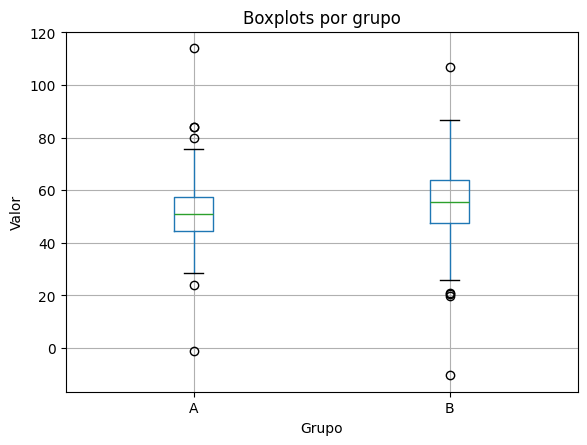

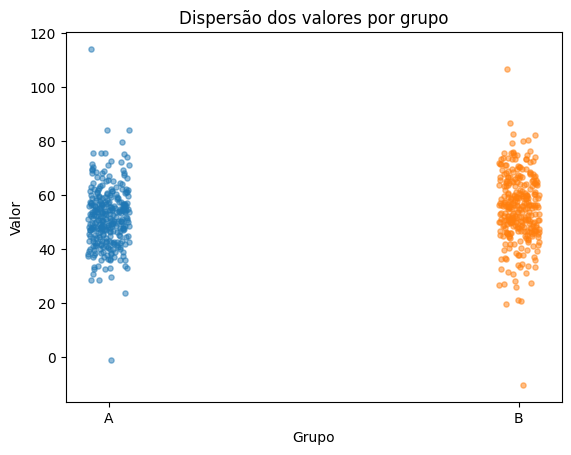

(             min         Q1    mediana         Q3         max        IQR  \
 grupo                                                                      
 A      -1.233243  44.552180  51.043106  57.257914  114.052487  12.705734   
 B     -10.407105  47.719918  55.420305  63.736139  106.776665  16.016222   
 
          lim_inf    lim_sup  
 grupo                        
 A      25.493578  76.316516  
 B      23.695585  87.760472  ,
 grupo
 A    6
 B    5
 Name: outlier, dtype: int64)

In [2]:
# Boxplot com detecção explícita de outliers pelo critério 1,5 IQR
# Esta célula assume que a variável 's' existe da etapa anterior.
# Caso 's' não exista, cria uma amostra base compatível.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Garantia de 's'
try:
    s  # verifica existência
except NameError:
    rng = np.random.default_rng(42)
    s = pd.Series(rng.normal(loc=52, scale=11, size=300), name="x")

# Grupo A derivado de 's', com alguns outliers artificiais para demonstração
grupo_A = s.values.copy()
outliers_A = np.array([np.min(grupo_A) - 25, np.max(grupo_A) + 30])
grupo_A = np.concatenate([grupo_A, outliers_A])

# Grupo B gerado com média e desvio diferentes e poucos outliers
rng = np.random.default_rng(123)
grupo_B_base = rng.normal(loc=np.mean(s) + 3, scale=np.std(s) * 1.2, size=s.size)
outliers_B = np.array([np.min(grupo_B_base) - 30, np.max(grupo_B_base) + 20])
grupo_B = np.concatenate([grupo_B_base, outliers_B])

# DataFrame consolidado
df_A = pd.DataFrame({"grupo": "A", "valor": grupo_A})
df_B = pd.DataFrame({"grupo": "B", "valor": grupo_B})
df = pd.concat([df_A, df_B], ignore_index=True)

# Função que calcula o resumo de cinco números e limites do critério 1,5 IQR
def cinco_numeros(serie):
    q1 = np.percentile(serie, 25)
    q2 = np.percentile(serie, 50)
    q3 = np.percentile(serie, 75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr
    minimo = np.min(serie)
    maximo = np.max(serie)
    return pd.Series({
        "min": minimo,
        "Q1": q1,
        "mediana": q2,
        "Q3": q3,
        "max": maximo,
        "IQR": iqr,
        "lim_inf": lim_inf,
        "lim_sup": lim_sup
    })

resumo = df.groupby("grupo")["valor"].apply(cinco_numeros).unstack()

# Marca outliers com base nos limites por grupo
def marca_outlier(sub):
    q1 = np.percentile(sub["valor"], 25)
    q3 = np.percentile(sub["valor"], 75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr
    return sub.assign(outlier=(sub["valor"] < lim_inf) | (sub["valor"] > lim_sup))

df = df.groupby("grupo", group_keys=False).apply(marca_outlier)

# Gráfico 1. Boxplot por grupo com pontos sobrepostos para ver densidade
plt.figure()
df.boxplot(column="valor", by="grupo")
plt.suptitle("")
plt.title("Boxplots por grupo")
plt.xlabel("Grupo")
plt.ylabel("Valor")
plt.show()

# Sobreposição de pontos com ruído horizontal leve para inspeção visual
plt.figure()
for idx, (g, sub) in enumerate(df.groupby("grupo")):
    x_center = idx + 1
    x_vals = np.full(sub.shape[0], x_center) + np.random.uniform(-0.05, 0.05, size=sub.shape[0])
    plt.scatter(x_vals, sub["valor"], alpha=0.5, s=14)
plt.xticks([1, 2], ["A", "B"])
plt.title("Dispersão dos valores por grupo")
plt.xlabel("Grupo")
plt.ylabel("Valor")
plt.show()

# Resultado numérico principal com contagem de outliers
contagem_outliers = df.groupby("grupo")["outlier"].sum()
resumo, contagem_outliers


### Explicação linha a linha do código

1. Importações de numpy, pandas e matplotlib para cálculo e visualização.
2. Verificação da existência de s. Caso s não exista, cria uma série com dados simulados compatíveis.
3. Construção do grupo A a partir de s. Inclui dois outliers artificiais para demonstrar o efeito no boxplot e na detecção pelo critério 1,5 IQR.
4. Construção do grupo B com outra média e outro desvio. Adiciona dois outliers artificiais para ampliar a comparação entre grupos.
5. Consolidação dos vetores em um DataFrame único com colunas grupo e valor. Essa estrutura facilita agregações por grupo e visualizações.
6. Definição da função cinco_numeros que calcula Q1, mediana, Q3, IQR, limites inferior e superior do critério 1,5 IQR, além de mínimo e máximo observados.
7. Aplicação da função por grupo para obter a tabela resumo com os cinco números e os limites calculados.
8. Definição da função marca_outlier que, para cada grupo, recalcula quartis e IQR e cria a coluna booleana outlier conforme o critério 1,5 IQR.
9. Aplicação de marca_outlier por grupo para adicionar a coluna outlier ao DataFrame df.
10. Criação do boxplot agrupado por grupo usando o método boxplot do pandas. O gráfico mostra mediana, caixa do IQR, whiskers e símbolos para outliers.
11. Ajustes de títulos e rótulos e exibição do boxplot.
12. Criação de um gráfico de dispersão dos valores com ruído horizontal leve para inspecionar densidade e observar onde estão os outliers no contexto do boxplot.
13. Configuração dos rótulos do eixo x, título e rótulos de eixos e exibição do gráfico de dispersão.
14. Cálculo da contagem de outliers por grupo e retorno final de duas saídas. A tabela resumo com os cinco números e limites. A contagem de outliers por grupo.

Observação. O critério 1,5 IQR é padrão, mas existem variações. Em contextos com caudas muito pesadas pode ser útil ajustar o multiplicador. Para relatórios, recomenda-se sempre reportar IQR, mediana e contagem de outliers, além de anexar uma nota sobre o critério utilizado.


## 3. Padronização e Z-score

### Parte teórica
Padronização transforma uma variável contínua x em uma escala adimensional de média zero e desvio padrão igual a um. O **Z-score** de uma observação x é dado por z igual a x menos a média dividido pelo desvio padrão. Em notação, z = (x − μ) dividido por σ. Quando μ e σ são desconhecidos, utilizam-se seus estimadores amostrais. Na prática de mineração de dados e aprendizado de máquina costuma-se calcular a média e o desvio no conjunto de treinamento e aplicar a mesma transformação nos dados de validação e de teste para evitar vazamento de informação.

Interpretação. Um Z-score indica quantos desvios padrão o valor está acima ou abaixo da média. Valores próximos de zero são típicos. Em distribuições aproximadamente normais, cerca de 95 por cento dos z estão no intervalo de menos 2 a 2 e cerca de 99,7 por cento entre menos 3 e 3. A regra de outliers por Z-score usa frequentemente o limiar absoluto maior que 3 como indício de ponto atípico quando a normalidade é razoável.

Escolha do desvio padrão -> Existem duas convenções. σ com divisor n e s com divisor n menos 1. Em aprendizado de máquina é comum usar o desvio com divisor n porque é a convenção de normalização implementada por bibliotecas como standard scaler. Em inferência clássica s com divisor n menos 1 é não viciado para variância sob normalidade. A diferença numérica é pequena para amostras moderadas e grandes. O importante é ser consistente na transformação e documentar o critério utilizado.

Padronização global e padronização por grupo -> Quando se comparam grupos com médias e dispersões distintas, pode-se padronizar globalmente para preservar diferenças entre grupos ou padronizar por grupo para remover deslocamentos e comparar perfis internos. A escolha depende do objetivo. Em um pipeline de modelagem, padronização global é comum quando se deseja manter o sinal de diferenças entre populações. Para análise diagnóstica intra-grupo, padronização por grupo é preferível.

Alternativa robusta. Em presença de caudas pesadas ou muitos outliers, o **Z-score robusto** usa mediana e MAD. Define-se z robusto igual a constante vezes x menos mediana dividido por MAD. A constante igual a 0,67448975 ajusta a escala para que, sob normalidade, a MAD seja comparável ao desvio padrão. Essa forma reduz a influência de pontos extremos na padronização.


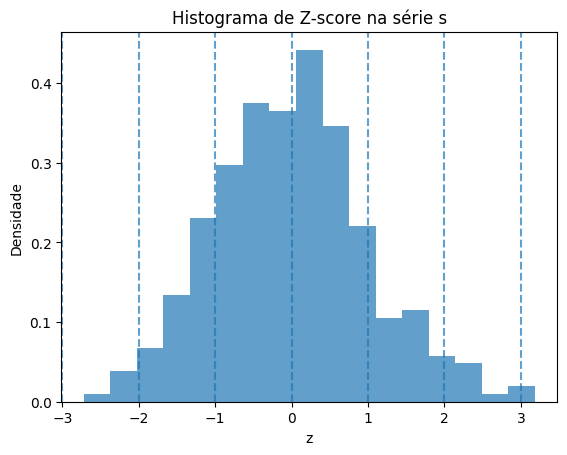

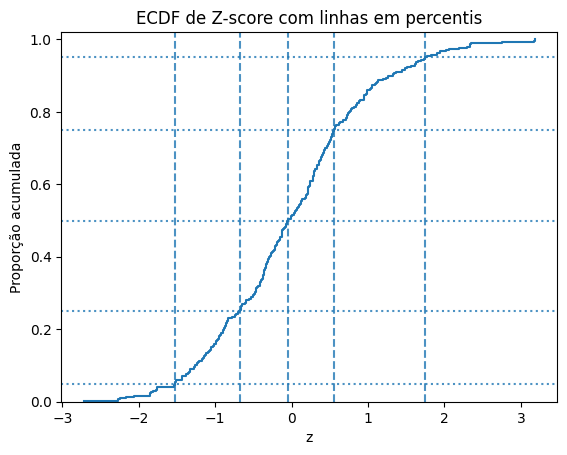

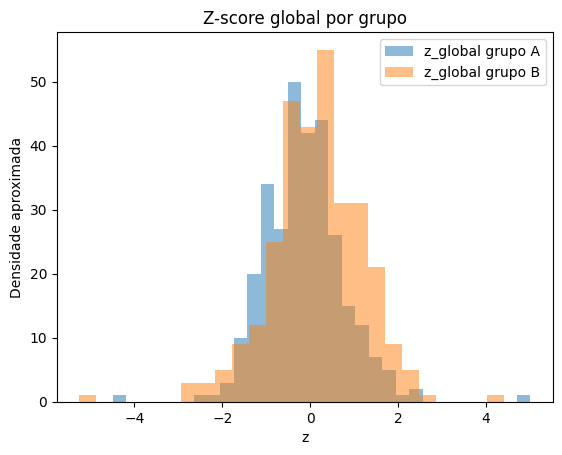

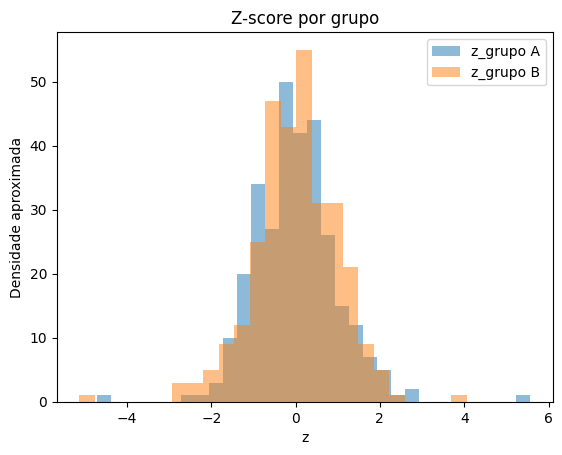

In [3]:
# Padronização com Z-score: global, por grupo e versão robusta
# Reutiliza 's' da etapa de medidas de posição e 'df' da etapa do boxplot, caso existam.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Garantia de existência de 's'
try:
    s  # série da etapa anterior
except NameError:
    rng = np.random.default_rng(42)
    s = pd.Series(rng.normal(loc=52, scale=11, size=300), name="x")

# 1) Z-score global na série 's' usando desvio com divisor n (ddof=0)
mu = s.mean()
sigma = s.std(ddof=0)
z = (s - mu) / sigma

# Verificação numérica básica
media_z = z.mean()
desvio_z_pop = z.std(ddof=0)
desvio_z_amostra = z.std(ddof=1)

# 2) Z-score robusto na série 's' com mediana e MAD
med = s.median()
mad = np.median(np.abs(s - med))
const = 0.67448975  # fator para normalidade
z_robusto = const * (s - med) / mad

# 3) Se houver 'df' com colunas ['grupo', 'valor'], calcula z global e z por grupo
try:
    assert isinstance(df, pd.DataFrame)
    assert {"grupo", "valor"}.issubset(df.columns)
    tem_df = True
except Exception:
    tem_df = False

if tem_df:
    # Z-score global em 'valor'
    mu_g = df["valor"].mean()
    sigma_g = df["valor"].std(ddof=0)
    df["z_global"] = (df["valor"] - mu_g) / sigma_g

    # Z-score por grupo em 'valor'
    stats_grupo = df.groupby("grupo")["valor"].agg(mu=lambda v: v.mean(), sd=lambda v: v.std(ddof=0))
    df = df.join(stats_grupo, on="grupo")
    df["z_grupo"] = (df["valor"] - df["mu"]) / df["sd"]
    df.drop(columns=["mu", "sd"], inplace=True)

# 4) Visualizações: histograma de z e ECDF de z
plt.figure()
plt.hist(z, bins="auto", density=True, alpha=0.7)
for t in [-3, -2, -1, 0, 1, 2, 3]:
    plt.axvline(t, linestyle="--", alpha=0.7)
plt.title("Histograma de Z-score na série s")
plt.xlabel("z")
plt.ylabel("Densidade")
plt.show()

xs = np.sort(z.values)
ys = np.arange(1, xs.size + 1) / xs.size
plt.figure()
plt.plot(xs, ys, drawstyle="steps-post")
for p in [5, 25, 50, 75, 95]:
    v = np.percentile(z, p)
    plt.axvline(v, linestyle="--", alpha=0.8)
    plt.axhline(p / 100.0, linestyle=":", alpha=0.8)
plt.title("ECDF de Z-score com linhas em percentis")
plt.xlabel("z")
plt.ylabel("Proporção acumulada")
plt.ylim(0, 1.02)
plt.show()

# 5) Diagnóstico de outliers por |z| > 3
conta_outliers_z = np.sum(np.abs(z) > 3)
conta_outliers_z_rob = np.sum(np.abs(z_robusto) > 3)

# 6) Se existir df, comparar padronização global vs por grupo
if tem_df:
    resumo_global = df.groupby("grupo")["z_global"].agg(["mean", "std"])
    resumo_grupo = df.groupby("grupo")["z_grupo"].agg(["mean", "std"])

    # Histogramas por grupo
    plt.figure()
    for g, sub in df.groupby("grupo"):
        plt.hist(sub["z_global"], bins="auto", alpha=0.5, label=f"z_global grupo {g}")
    plt.title("Z-score global por grupo")
    plt.xlabel("z")
    plt.ylabel("Densidade aproximada")
    plt.legend()
    plt.show()

    plt.figure()
    for g, sub in df.groupby("grupo"):
        plt.hist(sub["z_grupo"], bins="auto", alpha=0.5, label=f"z_grupo {g}")
    plt.title("Z-score por grupo")
    plt.xlabel("z")
    plt.ylabel("Densidade aproximada")
    plt.legend()
    plt.show()

# Saídas principais
resultado_s = pd.DataFrame({
    "media_s": [mu],
    "desvio_pop_s": [sigma],
    "media_z": [media_z],
    "desvio_z_pop": [desvio_z_pop],
    "desvio_z_amostra": [desvio_z_amostra],
    "outliers_|z|>3": [conta_outliers_z],
    "outliers_robustos_|z|>3": [conta_outliers_z_rob]
})

if tem_df:
    resultado_s, resumo_global, resumo_grupo
else:
    resultado_s

### Explicação linha a linha do código

1. Importações de numpy, pandas e matplotlib para cálculo, manipulação e gráficos.
2. Verificação da existência de s. Se não houver, cria-se uma série simulada para manter o notebook executável.
3. Cálculo da média μ e do desvio padrão σ de s com divisor n. Em seguida calcula-se o Z-score global z igual a s menos μ dividido por σ.
4. Cálculo de diagnósticos de z. A média de z deve ser próxima de zero e o desvio deve ser próximo de um. Reportam-se os desvios com divisor n e com divisor n menos 1 para comparação.
5. Cálculo do Z-score robusto em s. Obtém-se a mediana e a MAD. Aplica-se a constante de ajuste 0,67448975 para comparabilidade sob normalidade. Calcula-se z robusto igual a constante vezes s menos mediana dividido por MAD.
6. Verificação da existência do DataFrame df com as colunas grupo e valor. Essa estrutura vem do passo do boxplot. Se existir, ativa-se a parte comparativa.
7. Padronização global em df. Calcula-se z global igual a valor menos média global dividido por desvio global com divisor n. O objetivo é manter diferenças entre grupos.
8. Padronização por grupo em df. Primeiro obtêm-se média e desvio por grupo. Depois calcula-se z por grupo igual a valor menos média do grupo dividido por desvio do grupo. O objetivo é remover deslocamentos entre grupos para comparar variações internas.
9. Geração do histograma de z para s e linhas verticais de referência em z igual a menos 3, menos 2, menos 1, zero, 1, 2 e 3 para facilitar leitura de escala padronizada.
10. Construção da ECDF de z. Traça-se a curva acumulada e adicionam-se linhas verticais e horizontais em percentis selecionados para ilustrar interpretação probabilística de z.
11. Contagem de observações com módulo do Z-score maior que 3 em s. Repete-se a contagem com o Z-score robusto para comparação de sensibilidade a outliers.
12. Se df existir, resume-se a padronização global e a padronização por grupo por meio de média e desvio de z por grupo. Em z por grupo a média de cada grupo deve ficar próxima de zero e o desvio próximo de um.
13. Criação de histogramas adicionais por grupo. No primeiro gráfico utiliza-se z global para mostrar diferenças de posição entre grupos. No segundo gráfico utiliza-se z por grupo para mostrar perfis internos comparáveis.
14. Construção da tabela final com valores resumidos da série s e, se aplicável, das estatísticas por grupo. Essas saídas permitem registrar a transformação aplicada e checar consistência numérica.

Observação. Em um pipeline real deve-se ajustar os parâmetros de padronização no conjunto de treinamento e reutilizá-los nas demais partições. Documentar se foi usado divisor n ou n menos 1 e se a padronização foi global ou por grupo é fundamental para reprodutibilidade.


## 4. Assimetria e curtose

### Parte teórica
A forma de uma distribuição não é totalmente descrita apenas por média e desvio padrão. Duas medidas adicionais complementam essa visão: a **assimetria** e a **curtose**.

A assimetria quantifica o quanto a distribuição é simétrica em torno da média. Se o valor da assimetria for positivo, a cauda direita da distribuição é mais longa, o que indica concentração de observações em valores menores e presença de valores grandes ocasionais. Se o valor da assimetria for negativo, a cauda esquerda é mais longa, indicando concentração em valores maiores e presença de valores pequenos ocasionais. Assimetria próxima de zero sugere equilíbrio em torno da média. Em prática aplicada, valores entre −0,5 e 0,5 costumam indicar baixa assimetria, valores entre 0,5 e 1 indicam assimetria moderada e acima de 1 indicam assimetria acentuada.

A curtose avalia a concentração da distribuição em torno do centro e nas caudas. Uma distribuição normal serve como referência. Quando a curtose é próxima de zero (em excesso), a forma é semelhante à normal. Curtose positiva indica que a distribuição tem caudas mais pesadas e um pico central mais alto, sendo chamada de leptocúrtica. Curtose negativa indica caudas mais leves e um pico mais achatado, sendo chamada de platicúrtica. Valores em torno de zero representam distribuições mesocúrticas, próximas da normal.

Medidas robustas também podem ser usadas quando há presença de outliers. A assimetria de Bowley é calculada a partir de quartis, usando Q1, mediana e Q3, e a curtose de Moors utiliza octis, que são percentis a cada 12,5%. Essas abordagens evitam influência excessiva de pontos extremos, sendo mais estáveis em amostras reais.

Na prática, valores de assimetria e curtose são utilizados para diagnosticar dados antes de análises mais complexas. Em mineração de dados, essas medidas ajudam a decidir se é necessário aplicar transformações como logaritmo ou raiz quadrada em variáveis muito assimétricas, e também fornecem informações sobre a adequação de modelos que assumem normalidade.


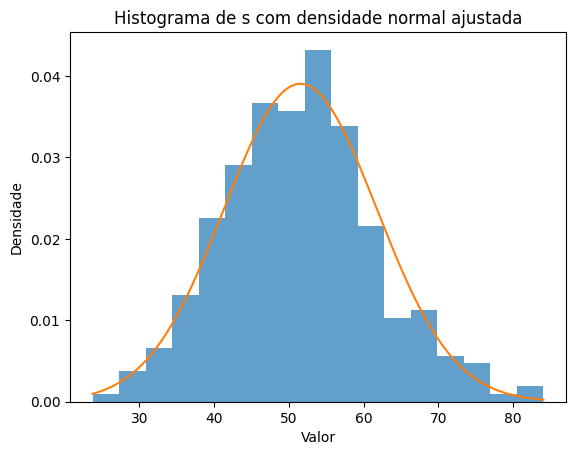

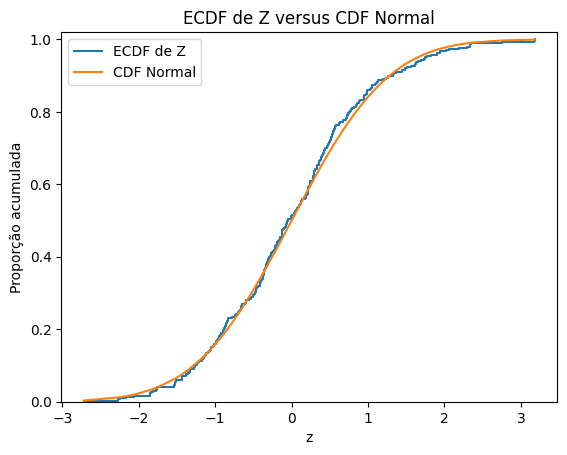

/tmp/ipython-input-280238181.py:118: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resumo_por_grupo = df.groupby("grupo").apply(resumo_grupo)


(    skew_g1  kurt_excesso_g2    bowley     moors    n
 0  0.293287         0.250473 -0.018979  1.296288  300,
         skew_g1  kurt_excesso_g2    bowley     moors      n
 grupo                                                      
 A      0.440435         4.101816 -0.021732  1.299186  302.0
 B     -0.386077         2.578540  0.038426  1.182530  302.0)

In [4]:
# Assimetria e curtose: momentos e versões robustas, com visualização
# Reutiliza 's' e, se existir, 'df' com ['grupo','valor'].

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Garantia de existência de 's'
try:
    s  # série criada nos itens anteriores
except NameError:
    rng = np.random.default_rng(42)
    s = pd.Series(rng.normal(loc=52, scale=11, size=300), name="x")

# Funções de assimetria e curtose com correção de viés (Fisher–Pearson)
def skew_fisher_bias_corrected(x):
    x = np.asarray(x, dtype=float)
    n = x.size
    if n < 3:
        return np.nan
    xm = x.mean()
    s = x.std(ddof=1)
    if s == 0:
        return 0.0
    z = (x - xm) / s
    return (n / ((n - 1) * (n - 2))) * np.sum(z**3)

def kurtosis_excess_fisher_bias_corrected(x):
    x = np.asarray(x, dtype=float)
    n = x.size
    if n < 4:
        return np.nan
    xm = x.mean()
    s = x.std(ddof=1)
    if s == 0:
        return -3.0  # por convenção, se não há variância, excesso negativo forte
    z2 = ((x - xm) / s) ** 2
    z4 = z2**2
    term1 = (n * (n + 1)) / ((n - 1) * (n - 2) * (n - 3)) * np.sum(z4)
    term2 = (3 * (n - 1) ** 2) / ((n - 2) * (n - 3))
    return term1 - term2  # excesso de curtose

# Versões robustas
def bowley_skew(x):
    x = pd.Series(x)
    q1, q2, q3 = x.quantile([0.25, 0.5, 0.75])
    denom = (q3 - q1)
    if denom == 0:
        return 0.0
    return (q3 + q1 - 2 * q2) / denom

def moors_kurtosis(x):
    x = pd.Series(x)
    p = [0.125, 0.25, 0.375, 0.625, 0.75, 0.875]
    p12_5, p25, p37_5, p62_5, p75, p87_5 = x.quantile(p).to_list()
    denom = (p75 - p25)
    if denom == 0:
        return np.nan
    return ((p87_5 - p62_5) + (p37_5 - p12_5)) / denom

# Cálculo para a série 's'
g1 = skew_fisher_bias_corrected(s)
g2 = kurtosis_excess_fisher_bias_corrected(s)
bow = bowley_skew(s)
moor = moors_kurtosis(s)

# Visualização 1: histograma de s com densidade normal ajustada
mu, sd = s.mean(), s.std(ddof=0)
xs = np.linspace(s.min(), s.max(), 300)
pdf_norm = (1.0 / (sd * math.sqrt(2 * math.pi))) * np.exp(-0.5 * ((xs - mu) / sd) ** 2)

plt.figure()
plt.hist(s, bins="auto", density=True, alpha=0.7)
plt.plot(xs, pdf_norm)
plt.title("Histograma de s com densidade normal ajustada")
plt.xlabel("Valor")
plt.ylabel("Densidade")
plt.show()

# Visualização 2: ECDF de Z com CDF normal teórica
z = (s - s.mean()) / s.std(ddof=0)
xs_z = np.sort(z.values)
ys_z = np.arange(1, xs_z.size + 1) / xs_z.size

def phi(z):
    return 0.5 * (1 + math.erf(z / math.sqrt(2)))

phi_vec = np.vectorize(phi)
cdf_norm = phi_vec(xs_z)

plt.figure()
plt.plot(xs_z, ys_z, drawstyle="steps-post", label="ECDF de Z")
plt.plot(xs_z, cdf_norm, label="CDF Normal")
plt.title("ECDF de Z versus CDF Normal")
plt.xlabel("z")
plt.ylabel("Proporção acumulada")
plt.legend()
plt.ylim(0, 1.02)
plt.show()

# Se houver df com grupos, calcular assimetria e curtose por grupo
try:
    tem_df = isinstance(df, pd.DataFrame) and {"grupo", "valor"}.issubset(df.columns)
except NameError:
    tem_df = False

if tem_df:
    def resumo_grupo(sub):
        arr = sub["valor"].values
        return pd.Series({
            "skew_g1": skew_fisher_bias_corrected(arr),
            "kurt_excesso_g2": kurtosis_excess_fisher_bias_corrected(arr),
            "bowley": bowley_skew(arr),
            "moors": moors_kurtosis(arr),
            "n": arr.size
        })
    resumo_por_grupo = df.groupby("grupo").apply(resumo_grupo)
else:
    resumo_por_grupo = None

# Tabela resumo principal
resumo_s = pd.DataFrame({
    "skew_g1": [g1],
    "kurt_excesso_g2": [g2],
    "bowley": [bow],
    "moors": [moor],
    "n": [s.size]
})

resumo_s, resumo_por_grupo


### Explicação linha a linha do código

1. Importam-se numpy, pandas e matplotlib, além de math, para cálculos e visualizações.
2. Garante-se a existência da série s. Se não existir, constrói-se uma amostra normal simulada para que o notebook permaneça executável.
3. Define-se a função de assimetria de Fisher–Pearson com correção de viés. Normaliza-se por s com ddof igual a 1 e aplica-se o fator \(n/((n-1)(n-2))\).
4. Define-se a função de curtose em excesso de Fisher com correção de viés. Calcula-se a soma das potências quartas padronizadas e ajustam-se os termos de correção para remover viés finito. Para variância nula, retorna-se excesso negativo por convenção.
5. Implementam-se as versões robustas. A assimetria de Bowley usa Q1, mediana e Q3. A curtose de Moors usa octis 12,5, 25, 37,5, 62,5, 75 e 87,5 por cento.
6. Calculam-se g1, g2, Bowley e Moors para a série s.
7. Constrói-se um histograma de s e sobrepõe-se a densidade de uma normal ajustada com média e desvio de s. Essa comparação visual ajuda a identificar caudas mais pesadas ou leves e possíveis assimetrias.
8. Padroniza-se s para obter z. Constrói-se a ECDF de z e traça-se a CDF teórica da normal usando a função erro para avaliação da aderência. Diferenças sistemáticas nas caudas refletem curtose e deslocamentos refletem assimetria.
9. Se existir df com colunas grupo e valor, calcula-se para cada grupo a assimetria e a curtose por momentos e as versões robustas, além do tamanho da amostra. Isso permite comparar formas entre grupos.
10. Organizam-se os resultados em duas tabelas. resumo_s traz g1, excesso de curtose g2, Bowley e Moors para s. resumo_por_grupo, quando disponível, traz as mesmas medidas por grupo.

Observação. Em amostras pequenas, correções de viés são importantes para que estimativas de g1 e g2 não se afastem sistematicamente de zero sob normalidade. Em presença de outliers, priorize interpretações com Bowley e Moors e use g1 e g2 como apoio contextual.


## 5. Teorema do Limite Central

### Parte teórica
O Teorema do Limite Central (TLC) é um dos pilares da estatística. Ele afirma que, quando se extrai sucessivas amostras aleatórias de uma população, a distribuição das médias amostrais tende a uma forma aproximadamente normal, mesmo que a distribuição original não seja normal. Quanto maior o tamanho da amostra, melhor a aproximação.

A importância prática do TLC é enorme. Ele justifica o uso da distribuição normal em inferência estatística, como na construção de intervalos de confiança e na realização de testes de hipótese. O TLC garante que, a partir de um tamanho de amostra moderado (tipicamente acima de 30 observações), a distribuição da média amostral pode ser tratada como normal com média igual à média populacional e desvio padrão igual ao desvio populacional dividido pela raiz quadrada do tamanho da amostra.

Na mineração de dados, esse resultado permite aplicar ferramentas paramétricas mesmo em contextos onde os dados originais não seguem a normal. Além disso, o TLC fundamenta o cálculo do erro padrão e sustenta a lógica de muitas técnicas de reamostragem e validação.


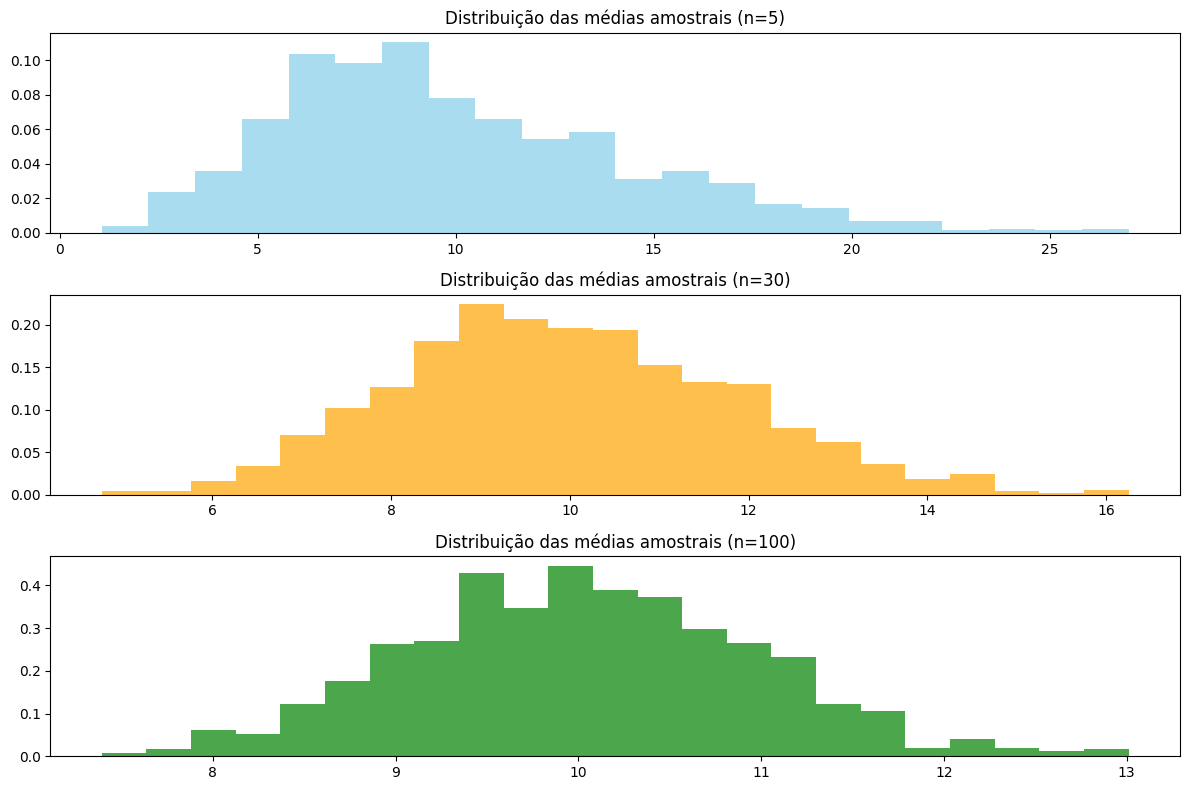

,n,media_medias,desvio_medias
0,5,9.983805,4.430688
1,30,9.972987,1.859188
2,100,10.017302,0.939749


In [5]:
# Teorema do Limite Central: simulação prática
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

# População com distribuição não normal (exponencial)
populacao = rng.exponential(scale=10, size=100_000)

# Função para extrair várias amostras e calcular suas médias
def medias_amostrais(pop, n, n_amostras=1000):
    amostras = rng.choice(pop, size=(n_amostras, n), replace=True)
    return amostras.mean(axis=1)

# Médias amostrais para tamanhos diferentes
medias_n5 = medias_amostrais(populacao, n=5)
medias_n30 = medias_amostrais(populacao, n=30)
medias_n100 = medias_amostrais(populacao, n=100)

# Visualização: histogramas comparando tamanhos de amostra
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.hist(medias_n5, bins="auto", density=True, alpha=0.7, color="skyblue")
plt.title("Distribuição das médias amostrais (n=5)")

plt.subplot(3, 1, 2)
plt.hist(medias_n30, bins="auto", density=True, alpha=0.7, color="orange")
plt.title("Distribuição das médias amostrais (n=30)")

plt.subplot(3, 1, 3)
plt.hist(medias_n100, bins="auto", density=True, alpha=0.7, color="green")
plt.title("Distribuição das médias amostrais (n=100)")

plt.tight_layout()
plt.show()

# Resumo numérico: média e desvio das distribuições de médias
resumo = pd.DataFrame({
    "n": [5, 30, 100],
    "media_medias": [np.mean(medias_n5), np.mean(medias_n30), np.mean(medias_n100)],
    "desvio_medias": [np.std(medias_n5, ddof=1), np.std(medias_n30, ddof=1), np.std(medias_n100, ddof=1)]
})

resumo


### Explicação linha a linha do código

1. Importam-se numpy, pandas e matplotlib.
2. Define-se o gerador aleatório para reprodutibilidade.
3. Cria-se uma população de 100 mil elementos com distribuição exponencial, que é assimétrica e não normal.
4. Define-se a função medias_amostrais que sorteia várias amostras de tamanho n e retorna a média de cada amostra.
5. Calculam-se três conjuntos de médias amostrais, com tamanhos n iguais a 5, 30 e 100, cada um com mil amostras.
6. Constroem-se três histogramas, um para cada tamanho de amostra, para visualizar a forma das distribuições das médias.
7. Ajusta-se o layout para melhor visualização e exibe-se a figura.
8. Calcula-se um resumo numérico com média e desvio das distribuições de médias para n iguais a 5, 30 e 100. A média das médias se aproxima da média da população e o desvio diminui conforme aumenta n, como previsto pelo TLC.

Observação. Este exemplo mostra que mesmo partindo de uma distribuição exponencial, que é fortemente assimétrica, as médias amostrais tornam-se aproximadamente normais à medida que o tamanho da amostra aumenta.


## 6. Erro padrão e estimadores

### Parte teórica
Em estatística, um **estimador** é uma regra ou fórmula usada para calcular um parâmetro populacional a partir de uma amostra. Por exemplo, a média amostral é um estimador da média populacional e a proporção amostral é um estimador da proporção populacional. Estimadores podem ser avaliados quanto a propriedades como viés (se a média das estimativas coincide com o parâmetro verdadeiro) e variância (o quanto as estimativas variam entre diferentes amostras).

O **erro padrão** é a medida da variabilidade de um estimador. Ele indica o desvio padrão da distribuição amostral de uma estatística. Quanto maior o tamanho da amostra, menor o erro padrão. Para a média, o erro padrão é igual ao desvio padrão populacional dividido pela raiz do tamanho da amostra. Como na prática não se conhece o desvio populacional, usa-se o desvio amostral como estimador.

O erro padrão é fundamental porque quantifica a incerteza de estimativas e serve como base para construção de intervalos de confiança e realização de testes de hipótese. Em mineração de dados e aprendizado de máquina, ele aparece implicitamente em técnicas de validação e reamostragem, sendo útil para comparar desempenho entre modelos ou métricas obtidas em diferentes subconjuntos de dados.


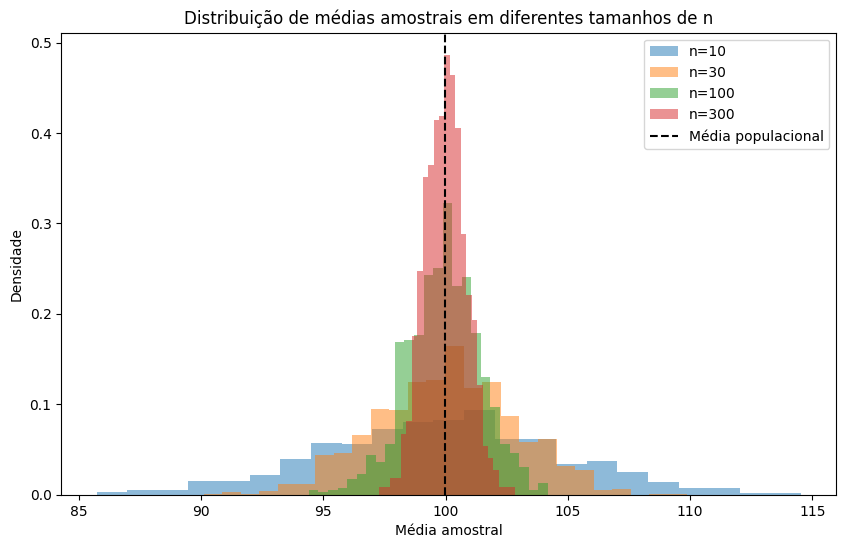

,n,media_estimada,erro_padrao_empirico,erro_padrao_teorico
0,10,100.044413,4.779814,4.756473
1,30,99.975336,2.729454,2.746151
2,100,99.988086,1.529822,1.504129
3,300,100.024363,0.866293,0.868409


In [6]:
# Erro padrão e estimadores: simulação com médias amostrais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

# População com média e desvio conhecidos
populacao = rng.normal(loc=100, scale=15, size=200_000)

# Parâmetros verdadeiros
mu_pop = np.mean(populacao)
sigma_pop = np.std(populacao, ddof=0)

# Função para calcular médias amostrais
def medias_amostrais(pop, n, n_amostras=1000):
    amostras = rng.choice(pop, size=(n_amostras, n), replace=True)
    return amostras.mean(axis=1)

# Comparação de tamanhos de amostra
ns = [10, 30, 100, 300]
resultados = []

for n in ns:
    medias = medias_amostrais(populacao, n)
    media_estimada = np.mean(medias)
    erro_padrao_empirico = np.std(medias, ddof=1)
    erro_padrao_teorico = sigma_pop / np.sqrt(n)
    resultados.append([n, media_estimada, erro_padrao_empirico, erro_padrao_teorico])

tabela = pd.DataFrame(resultados, columns=["n", "media_estimada", "erro_padrao_empirico", "erro_padrao_teorico"])

# Visualização: dispersão da média amostral em diferentes n
plt.figure(figsize=(10, 6))
for n in ns:
    medias = medias_amostrais(populacao, n)
    plt.hist(medias, bins="auto", density=True, alpha=0.5, label=f"n={n}")
plt.axvline(mu_pop, color="black", linestyle="--", label="Média populacional")
plt.title("Distribuição de médias amostrais em diferentes tamanhos de n")
plt.xlabel("Média amostral")
plt.ylabel("Densidade")
plt.legend()
plt.show()

tabela


### Explicação linha a linha do código

1. Importam-se numpy, pandas e matplotlib.
2. Define-se o gerador aleatório para reprodutibilidade.
3. Cria-se uma população grande simulada a partir de uma normal com média 100 e desvio 15.
4. Calculam-se os parâmetros verdadeiros da população: média e desvio padrão populacional.
5. Define-se a função medias_amostrais que extrai várias amostras de tamanho n e retorna as médias de cada uma.
6. Define-se a lista de tamanhos de amostra a serem testados: 10, 30, 100 e 300.
7. Para cada tamanho n, calcula-se: (a) média das médias amostrais, (b) erro padrão empírico (desvio das médias obtidas) e (c) erro padrão teórico (desvio populacional dividido pela raiz de n).
8. Organizam-se os resultados em uma tabela para comparação entre valores empíricos e teóricos.
9. Produz-se um histograma das distribuições de médias amostrais para cada n, mostrando que o espalhamento diminui conforme a amostra cresce.
10. Adiciona-se uma linha tracejada representando a média populacional, servindo como referência para a posição central.
11. Exibe-se a tabela com n, média estimada, erro padrão empírico e erro padrão teórico.

Observação. Os resultados mostram que o erro padrão diminui à medida que n aumenta, o que confirma que amostras maiores produzem estimativas mais precisas da média populacional.


## 7. Intervalo de confiança

### Parte teórica
O intervalo de confiança (IC) é uma faixa de valores construída a partir de uma amostra que tem grande probabilidade de conter o verdadeiro parâmetro populacional. Em vez de fornecer apenas uma estimativa pontual, como a média amostral, o IC quantifica a incerteza da estimativa. A ideia é que, se repetíssemos o processo de amostragem muitas vezes, uma certa proporção dos intervalos calculados incluiria o valor verdadeiro do parâmetro.

O nível de confiança mais comum é 95%. Isso significa que, em longas repetições de amostras independentes, cerca de 95% dos intervalos de confiança assim construídos conteriam o parâmetro populacional. Outros níveis, como 90% ou 99%, também podem ser usados de acordo com o grau de precisão desejado.

Para médias, o intervalo de confiança é construído usando a média amostral mais ou menos uma margem de erro. Essa margem de erro depende do erro padrão da média e de um valor crítico. Quando o desvio populacional é conhecido e a amostra é grande, usa-se o valor crítico da distribuição normal. Quando o desvio é estimado a partir da amostra e o tamanho da amostra é pequeno, utiliza-se a distribuição t de Student.

Na prática, intervalos de confiança são aplicados em pesquisas de opinião, estudos clínicos, indicadores de qualidade e em mineração de dados para avaliar métricas de desempenho. Eles fornecem não apenas uma estimativa central, mas também a amplitude de incerteza, ajudando a interpretar a confiabilidade dos resultados.


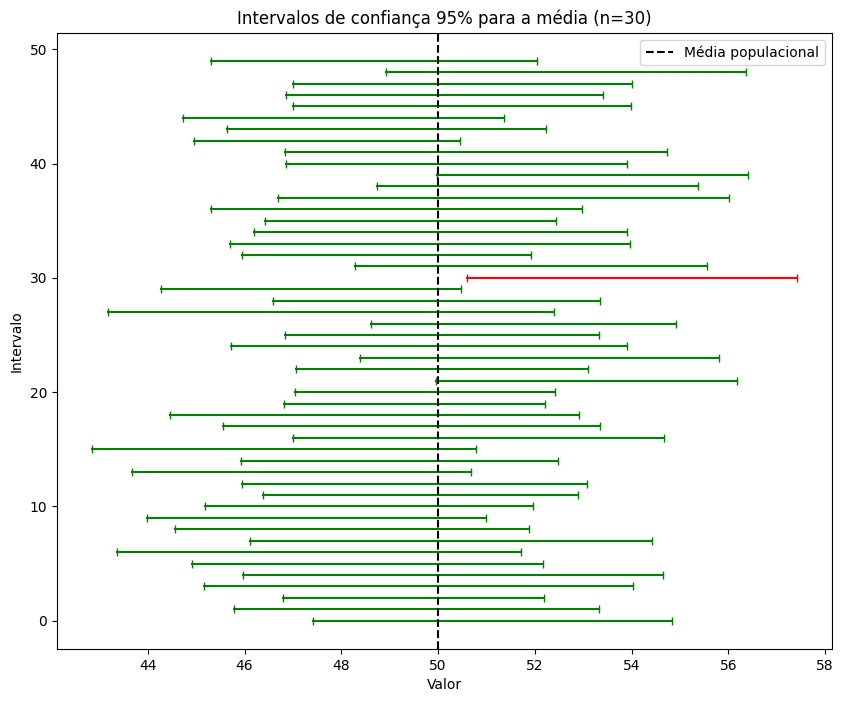

np.float64(0.98)

In [7]:
# Intervalos de confiança para a média
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

rng = np.random.default_rng(42)

# População simulada
populacao = rng.normal(loc=50, scale=10, size=200_000)
mu_pop = np.mean(populacao)

# Função para construir IC a partir de uma amostra
def ic_media(amostra, nivel=0.95):
    n = len(amostra)
    media = np.mean(amostra)
    desvio = np.std(amostra, ddof=1)
    erro_padrao = desvio / np.sqrt(n)
    t_critico = stats.t.ppf((1 + nivel) / 2, df=n-1)
    margem = t_critico * erro_padrao
    return media - margem, media + margem, media

# Extraindo amostras e construindo ICs
n = 30
n_intervalos = 50
intervalos = []
for _ in range(n_intervalos):
    amostra = rng.choice(populacao, size=n, replace=False)
    li, ls, media = ic_media(amostra)
    intervalos.append([li, ls, media])

intervalos = pd.DataFrame(intervalos, columns=["li", "ls", "media"])

# Visualização: intervalos de confiança
plt.figure(figsize=(10, 8))
for i, row in intervalos.iterrows():
    color = "green" if row["li"] <= mu_pop <= row["ls"] else "red"
    plt.plot([row["li"], row["ls"]], [i, i], color=color, marker="|")
plt.axvline(mu_pop, color="black", linestyle="--", label="Média populacional")
plt.title("Intervalos de confiança 95% para a média (n=30)")
plt.xlabel("Valor")
plt.ylabel("Intervalo")
plt.legend()
plt.show()

# Proporção de ICs que contêm a média verdadeira
proporcao = np.mean((intervalos["li"] <= mu_pop) & (intervalos["ls"] >= mu_pop))
proporcao


### Explicação linha a linha do código

1. Importam-se numpy, pandas, matplotlib e a biblioteca scipy.stats.
2. Define-se o gerador aleatório para reprodutibilidade.
3. Cria-se uma população simulada a partir de uma distribuição normal com média 50 e desvio 10. Calcula-se a média populacional real para referência.
4. Define-se a função ic_media. A função calcula a média amostral, o desvio padrão amostral e o erro padrão. Obtém o valor crítico da distribuição t de Student para o nível de confiança desejado e constrói os limites inferior e superior do intervalo.
5. Sorteia-se repetidamente amostras de tamanho n igual a 30 da população. Para cada amostra, calcula-se o intervalo de confiança e armazena-se a média amostral.
6. Organizam-se os resultados em um DataFrame com colunas li (limite inferior), ls (limite superior) e média.
7. Cria-se um gráfico com os intervalos. Cada intervalo é desenhado em uma linha horizontal. Intervalos que contêm a média verdadeira são coloridos em verde e os que não contêm são coloridos em vermelho.
8. Traça-se uma linha vertical tracejada na posição da média populacional, que serve como referência.
9. Exibe-se o gráfico com título, rótulos de eixos e legenda.
10. Calcula-se a proporção de intervalos que contêm a média populacional. Esse valor deve ser próximo de 0,95, refletindo o nível de confiança definido.

Observação. A simulação mostra que nem todos os intervalos contêm o verdadeiro valor do parâmetro. O nível de confiança refere-se à proporção de intervalos corretos em repetições, e não à certeza de um intervalo individual.


## 8. Distribuição t-Student

### Parte teórica
A distribuição t de Student é usada quando se trabalha com amostras pequenas e o desvio padrão da população é desconhecido. Em vez de assumir a normal padrão, utiliza-se a t porque ela considera a variabilidade adicional causada pela estimação do desvio a partir da amostra. Quanto menor o tamanho da amostra, mais pesadas são as caudas da t em comparação com a normal. Isso reflete maior incerteza e protege contra conclusões precipitadas a partir de dados limitados.

Um aspecto central da distribuição t é o número de **graus de liberdade**, que geralmente corresponde ao tamanho da amostra menos um. À medida que os graus de liberdade aumentam, a t-Student se aproxima da normal padrão. Em amostras grandes, a diferença prática entre as duas distribuições praticamente desaparece.

A distribuição t-Student é fundamental para a construção de intervalos de confiança da média e para testes de hipótese envolvendo médias, especialmente quando a amostra é pequena. É amplamente aplicada em áreas como controle de qualidade, estudos clínicos e mineração de dados, quando os tamanhos de amostra podem variar entre grupos e não se conhece a variabilidade populacional.


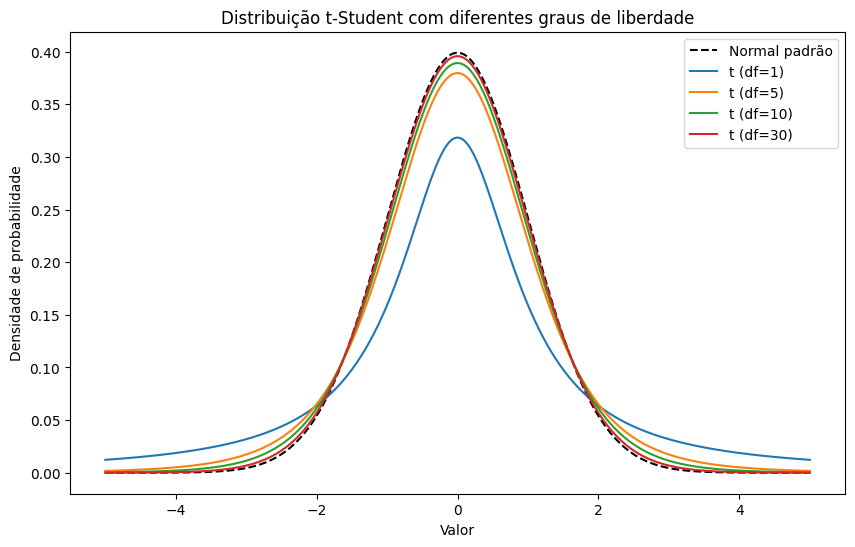

((np.float64(86.28780261757007), np.float64(103.6450581302538)),
 (np.float64(84.94970552712333), np.float64(104.98315522070054)))

In [9]:
# Distribuição t-Student: visualização e comparação com a normal
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Valores no eixo x
xs = np.linspace(-5, 5, 500)

# Distribuições t com diferentes graus de liberdade
dfs = [1, 5, 10, 30]
t_pdfs = {df: stats.t.pdf(xs, df) for df in dfs}

# Distribuição normal padrão
normal_pdf = stats.norm.pdf(xs, 0, 1)

# Plotagem
plt.figure(figsize=(10, 6))
plt.plot(xs, normal_pdf, color="black", linestyle="--", label="Normal padrão")
for df, pdf in t_pdfs.items():
    plt.plot(xs, pdf, label=f"t (df={df})")
plt.title("Distribuição t-Student com diferentes graus de liberdade")
plt.xlabel("Valor")
plt.ylabel("Densidade de probabilidade")
plt.legend()
plt.show()

# Exemplo prático: intervalo de confiança com normal vs t
rng = np.random.default_rng(42)
amostra = rng.normal(loc=100, scale=15, size=10)  # amostra pequena
n = len(amostra)
media = np.mean(amostra)
desvio = np.std(amostra, ddof=1)
erro_padrao = desvio / np.sqrt(n)

# IC 95% usando normal
z_critico = stats.norm.ppf(0.975)
ic_normal = (media - z_critico * erro_padrao, media + z_critico * erro_padrao)

# IC 95% usando t-Student
t_critico = stats.t.ppf(0.975, df=n-1)
ic_t = (media - t_critico * erro_padrao, media + t_critico * erro_padrao)

ic_normal, ic_t


### Explicação linha a linha do código

1. Importam-se numpy, matplotlib e scipy.stats para cálculos e gráficos.
2. Define-se um eixo de valores de −5 a 5, cobrindo a região principal das distribuições.
3. Calculam-se as funções de densidade da distribuição t para diferentes graus de liberdade (1, 5, 10 e 30).
4. Calcula-se a função de densidade da normal padrão para comparação.
5. Constrói-se um gráfico com as curvas da normal padrão e das distribuições t. Observa-se que, quanto menor o número de graus de liberdade, mais pesadas são as caudas da t.
6. Cria-se um exemplo prático com uma amostra pequena de tamanho 10 de uma população normal simulada com média 100 e desvio 15.
7. Calculam-se média, desvio e erro padrão da amostra.
8. Constrói-se um intervalo de confiança de 95% para a média usando a normal, com valor crítico obtido da função de distribuição acumulada.
9. Constrói-se o mesmo intervalo usando a t-Student com 9 graus de liberdade.
10. Retornam-se os dois intervalos. Em geral, o intervalo com t é mais largo, refletindo maior cautela em amostras pequenas.

Observação. A diferença entre os intervalos tende a desaparecer conforme o tamanho da amostra aumenta. Essa é a razão pela qual, em grandes amostras, o uso da normal é aceitável, enquanto em amostras pequenas a t-Student é a escolha correta.


## 9. Testes de hipótese

### Parte teórica
Testes de hipótese são procedimentos formais para tomar decisões sobre parâmetros populacionais com base em dados amostrais. O processo começa com duas afirmações opostas. A **hipótese nula (H0)** representa o estado de referência ou ausência de efeito, enquanto a **hipótese alternativa (H1)** representa a presença de efeito ou diferença. O objetivo do teste é avaliar se os dados fornecem evidências suficientes para rejeitar H0 em favor de H1.

O procedimento geral envolve:
1. Definição de H0 e H1 de forma clara e relacionada ao problema.
2. Escolha do nível de significância (α), que representa a probabilidade máxima de rejeitar H0 quando ela é verdadeira. Valores comuns são 0,05 ou 0,01.
3. Seleção do teste estatístico apropriado, de acordo com o tipo de variável, tamanho da amostra e pressupostos sobre a população.
4. Cálculo do valor da estatística de teste a partir dos dados da amostra.
5. Determinação do valor crítico ou cálculo do **p-valor**. O p-valor é a probabilidade de observar um resultado tão extremo quanto o obtido, assumindo que H0 é verdadeira.
6. Tomada de decisão: se p ≤ α, rejeita-se H0; caso contrário, não se rejeita H0.

Existem diferentes tipos de testes. Para médias, utiliza-se o teste t de Student quando o desvio populacional é desconhecido. Para proporções, utiliza-se o teste z. Existem testes bilaterais, que avaliam desvios em ambas as direções, e unilaterais, que avaliam apenas uma direção de interesse.

Interpretação prática. Rejeitar H0 não significa provar que H1 é verdadeira, apenas que há evidências contra H0 no nível de significância escolhido. Não rejeitar H0 não significa aceitar H0 como verdade absoluta, mas apenas que os dados não fornecem evidência suficiente para rejeitá-la. Além disso, é importante distinguir entre significância estatística e relevância prática: um resultado pode ser estatisticamente significativo, mas ter efeito muito pequeno em termos práticos.

Na mineração de dados, testes de hipótese são usados para comparar médias de grupos, verificar diferenças de proporções de eventos, avaliar ajustes de modelos e validar resultados de experimentos controlados, como testes A/B.

### Exemplo prático
Considere um cenário em que uma empresa deseja avaliar se uma nova formulação de um produto altera o tempo médio de processamento em comparação com a formulação anterior. A hipótese nula (H0) estabelece que não há diferença entre as médias dos dois grupos. A hipótese alternativa (H1) estabelece que há diferença entre as médias. Como não se sabe o desvio padrão populacional e o tamanho da amostra é limitado, o teste adequado é o **t de Student para duas amostras independentes**.

- **H0**: μ1 = μ2 (as médias são iguais)  
- **H1**: μ1 ≠ μ2 (as médias são diferentes)  
- **Nível de significância (α)**: 0,05  

O teste avalia se a diferença observada nas médias das amostras é suficientemente grande para rejeitar H0 ao nível de 5% de significância.

In [ ]:
# Teste de hipótese: t de Student para duas amostras independentes
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

# Amostra do produto antigo (grupo A) e do produto novo (grupo B)
grupo_A = rng.normal(loc=50, scale=8, size=30)   # média ~50
grupo_B = rng.normal(loc=54, scale=8, size=30)   # média ~54

# Estatísticas descritivas
media_A, desvio_A = np.mean(grupo_A), np.std(grupo_A, ddof=1)
media_B, desvio_B = np.mean(grupo_B), np.std(grupo_B, ddof=1)

# Teste t para duas amostras independentes (assumindo variâncias iguais)
t_stat, p_valor = stats.ttest_ind(grupo_A, grupo_B, equal_var=True)

# Visualização: histogramas comparando os grupos
plt.figure(figsize=(10, 6))
plt.hist(grupo_A, bins="auto", alpha=0.6, label="Produto antigo (A)")
plt.hist(grupo_B, bins="auto", alpha=0.6, label="Produto novo (B)")
plt.axvline(media_A, color="blue", linestyle="--", label=f"Média A = {media_A:.2f}")
plt.axvline(media_B, color="orange", linestyle="--", label=f"Média B = {media_B:.2f}")
plt.title("Distribuição dos tempos de processamento")
plt.xlabel("Tempo")
plt.ylabel("Frequência")
plt.legend()
plt.show()

media_A, desvio_A, media_B, desvio_B, t_stat, p_valor


### Explicação linha a linha do código

1. Importam-se numpy para simulação, scipy.stats para o teste estatístico e matplotlib para visualização.
2. Define-se o gerador aleatório para reprodutibilidade.
3. Criam-se duas amostras independentes: grupo A (produto antigo) com média populacional aproximada de 50 e grupo B (produto novo) com média em torno de 54. Ambos têm desvio de 8 e tamanho de 30 observações.
4. Calculam-se média e desvio amostral de cada grupo para comparação descritiva inicial.
5. Executa-se o teste t para duas amostras independentes, assumindo variâncias iguais. O resultado fornece a estatística t e o p-valor.
6. Constrói-se um histograma sobreposto das duas amostras, com linhas verticais indicando as médias estimadas de cada grupo.
7. Exibem-se os valores numéricos principais: média e desvio de A e B, estatística t e p-valor.

### Interpretação
- Se o **p-valor ≤ 0,05**, rejeita-se H0 e conclui-se que há diferença estatisticamente significativa entre as médias dos dois produtos.  
- Se o **p-valor > 0,05**, não há evidências suficientes para rejeitar H0, sugerindo que as médias não diferem de forma significativa.  
- No exemplo simulado, espera-se um p-valor pequeno, indicando diferença entre as médias.

Observação. Em aplicações reais, é importante verificar os pressupostos do teste t, como a normalidade das amostras e a homogeneidade das variâncias. Quando esses pressupostos não são válidos, recomenda-se usar testes não paramétricos, como o teste de Mann-Whitney.

### Testes de hipótese e consulta a tabelas de distribuição

Antes da popularização do software estatístico, a decisão em testes de hipótese era tomada consultando **tabelas impressas** da distribuição normal padrão ou da distribuição t de Student.

O processo é o seguinte:

1. **Definir H0 e H1**.  
   Exemplo: H0 = a média populacional é 50; H1 = a média populacional é diferente de 50.

2. **Escolher o nível de significância (α)**.  
   O valor de α define a probabilidade de rejeitar H0 quando ela é verdadeira. Exemplo: α = 0,05 (5%).

3. **Identificar o tipo de teste**.  
   - **Bilateral**: verifica desvios para mais ou para menos. Divide-se α em duas caudas (α/2 em cada).  
   - **Unilateral**: verifica apenas uma direção (por exemplo, se a média aumentou). Todo α fica em uma cauda.

4. **Calcular a estatística de teste**.  
   Para a média:  
   \[
   t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}
   \]  
   onde \(\bar{x}\) é a média amostral, \(\mu_0\) é o valor hipotético da média, \(s\) é o desvio amostral e \(n\) é o tamanho da amostra.

5. **Obter o valor crítico na tabela**.  
   - Identifica-se o número de graus de liberdade (n − 1).  
   - Procura-se o valor crítico correspondente a α (ou α/2) na tabela da distribuição t.  
   Exemplo: para n − 1 = 29 e α = 0,05 em teste bilateral, a tabela fornece t crítico ≈ ±2,045.

6. **Comparar a estatística de teste com o valor crítico**.  
   - Se |t calculado| > |t crítico|, rejeita-se H0.  
   - Caso contrário, não se rejeita H0.

Esse procedimento manual deixa claro como as áreas nas caudas da distribuição definem regiões de rejeição. Em sala de aula, mostrar a tabela ajuda a entender por que, em amostras pequenas, a distribuição t tem valores críticos maiores que a normal, produzindo testes mais conservadores.

### Como consultar a tabela da distribuição t-Student

A tabela da t-Student mostra **valores críticos** para diferentes combinações de **nível de significância (α)** e **graus de liberdade (gl)**.

**Passo a passo para usar a tabela:**

1. **Defina o tipo de teste e o nível de significância (α):**  
   - Em um teste **bilateral** com α = 0,05, divide-se o erro em duas caudas: α/2 = 0,025 em cada cauda.  
   - Em um teste **unilateral** com α = 0,05, todo o erro está em apenas uma cauda.

2. **Calcule os graus de liberdade (gl):**  
   - Para teste com uma média: gl = n − 1, onde n é o tamanho da amostra.  
   - Para teste com duas médias independentes de tamanhos iguais: gl = n₁ + n₂ − 2.

3. **Localize a linha da tabela correspondente ao número de gl.**  
   Exemplo: se n = 30, então gl = 29.

4. **Vá até a coluna que corresponde ao α do teste:**  
   - Se for bilateral com α = 0,05, procure a coluna "0,05 (bilateral)".  
   - Se for unilateral com α = 0,05, procure a coluna "0,05 (unilateral)".

5. **Leia o valor crítico:**  
   Esse é o limite que a estatística de teste precisa ultrapassar (em valor absoluto) para rejeitar a hipótese nula.

**Exemplo prático:**  
Uma amostra de tamanho n = 30 (gl = 29), teste bilateral com α = 0,05.  
Na tabela, o valor crítico é aproximadamente **t = ±2,045**.  
Se o valor da estatística calculada for menor que −2,045 ou maior que +2,045, rejeita-se H0.

---

👉 Tabelas da distribuição t-Student podem ser consultadas online, como neste link:  
[Exemplo de tabela t-Student](https://www.statisticshowto.com/tables/t-distribution-table/)  